# IPCC SR1.5 scenario database categorization 
## Assigning categories and running diagnostic checks

<img style="float: right; height: 100px; margin-top: 10px;" src="_static/IIASA_logo.png">
<img style="float: right; height: 80px;" src="_static/IAMC_logo.jpg">

This notebook contains the temperature categorization and some diagnostic checks  
for the scenario database of the IPCC's _"Special Report on Global Warming of 1.5°C"_.  
The scenario database can be accessed at https://db1.ene.iiasa.ac.at/IPCCSR15DB.

## Load ``pyam_analysis`` package <br> and import data from a csv snapshot file

The snapshot file can be downloaded from https://db1.ene.iiasa.ac.at/IPCCSR15DB/.  
Please contact the database admin at <ipccsr15db.ene.admin@iiasa.ac.at> for getting an account.

For an introduction of the notation and the features of the ``pyam_analysis`` package, 
please refer to the tutorial notebook [sr1p5_tutorial.ipynb](sr1p5_tutorial.ipynb), 
which is provided as part of this repository.
The tutorial will take you through all functions and options used here,
and provide further introduction and pointers .

In [1]:
from pyam_analysis import IamDataFrame

<IPython.core.display.Javascript object>

In [2]:
sr1p5 = IamDataFrame(path='data', file='ipccsr15_dbsnapshot', ext='csv', regions=['World'])

## Categorization of scenarios

This section applies the categorization of scenario as defined in Chapter 2 of the Special Report.

The category specification (Table 2.2.2 in the FOD) is repeated here for easier reference.

|**Types of mitigation pathways**|**Probability to exceed a given warming threshold**|**Symbol** &nbsp; &nbsp; |**Acronym**|
|--------------------------------|---------------------------------------------------|------------|-----------|
| Well below 1.5°C |$P_{1.5°C}(2100) < 0.331$ and $P_{2°C}(2016-2100) < 0.331$        | $<1.5°C$   | WB1.5C    |
| Medium 1.5°C     |$0.331 ≤ P_{1.5°C}(2100) < 0.501$ and $P_{2°C}(2016-2100) < 0.331$| $~1.5°C$   | Med1.5C   |
| Well below 2°C   |$P_{2°C}(2016-2100) < 0.331$ (excluding WB1.5C & Med1.5C)        | $<2°C$     | WB2C      |
| Medium 2°C       |$P_{2°C}(2016-2100) < 0.501$ (excluding above)                   | $~2°C$     | Med2C     |
| Well below 2.5°C |$P_{2.5°C}(2016-2100) < 0.331$ (excluding above)                 | $<2.5°C$   | WB2.5C    |
| Well below 3°C   |$P_{3°C}(2016-2100) < 0.331$ (excluding above)                   | $<3°C$     | WB3C      |
| Medium 3.5°C     |$P_{3.5°C}(2016-2100) < 0.501$ (excluding above)                 | $~3.5°C$   | Med3.5C   | 
| Above 3.5°C      |$P_{3.5°C} ≥ 0.501$ during at least 1 year                       | $>3.5°C$   | Above3.5C |

Keep in mind that setting a category will re-assign scenarios (in case they have already been assigned).
So in case of going back and forth in this notebook (i.e., not executing the cells in the correct order), 
make sure to reset the categorization and start again from the first category assignment.

In [3]:
sr1p5.reset_category()

In [4]:
sr1p5.category('WB1.5C',
               {'AR5 climate diagnostics|Temperature|Exceedance Probability|1.5 degC|MAGICC6': 
                    {'up': 0.331, 'year': 2100}},
               color='cornflowerblue', display=None)

23 scenarios categorized as 'WB1.5C'


In [5]:
sr1p5.category('Med1.5C', 
               {'AR5 climate diagnostics|Temperature|Exceedance Probability|1.5 degC|MAGICC6': 
                    {'up': 0.501, 'lo': 0.331, 'year': 2100},
                'AR5 climate diagnostics|Temperature|Exceedance Probability|2.0 degC|MAGICC6':
                    {'up': 0.331}
                },
               color='navy', display=None)

14 scenarios categorized as 'Med1.5C'


In [6]:
sr1p5.category('WB2C', 
                {'AR5 climate diagnostics|Temperature|Exceedance Probability|2.0 degC|MAGICC6':
                    {'up': 0.331}},
               filters={'category': 'uncategorized'}, color='forestgreen', display=None)

31 scenarios categorized as 'WB2C'


In [7]:
sr1p5.category('WB2.5C', 
                {'AR5 climate diagnostics|Temperature|Exceedance Probability|2.5 degC|MAGICC6':
                    {'up': 0.331}},
               filters={'category': 'uncategorized'}, color='darkorange', display=None)

52 scenarios categorized as 'WB2.5C'


In [8]:
sr1p5.category('WB3C', 
                {'AR5 climate diagnostics|Temperature|Exceedance Probability|3.0 degC|MAGICC6':
                    {'up': 0.331}},
               filters={'category': 'uncategorized'}, color='firebrick', display=None)

26 scenarios categorized as 'WB3C'


In [9]:
sr1p5.category('Med3.5C', 
                {'AR5 climate diagnostics|Temperature|Exceedance Probability|3.5 degC|MAGICC6':
                    {'up': 0.501}},
               filters={'category': 'uncategorized'}, color='fuchsia', display=None)

31 scenarios categorized as 'Med3.5C'


In [10]:
sr1p5.category('Above3.5C', 
                {'AR5 climate diagnostics|Temperature|Exceedance Probability|3.5 degC|MAGICC6':
                    {}},
               filters={'category': 'uncategorized'}, color='darkmagenta', display=None)

30 scenarios categorized as 'Above3.5C'


## Analysis of assigned categories

First, show a list of all scenarios that were not assigned to a category.

Then, show a colored pivot table of categories; as an example, the SSP family of scenarios is used here.

In [11]:
sr1p5.category('uncategorized', display='list')

Empty DataFrame
Columns: []
Index: [(uncategorized, C-ROADS v5 003s, Ratchet no overshoot to 1point5), (uncategorized, C-ROADS v5 003s, Ratchet to 1point5), (uncategorized, C-ROADS v5 003s, Reference), (uncategorized, En-ROADS v95j, Ratchet to 1point5), (uncategorized, En-ROADS v95j, Reference), (uncategorized, GLOBIOM_EMF33, EMF33-S-B0), (uncategorized, GLOBIOM_EMF33, EMF33-S-B0C), (uncategorized, GLOBIOM_EMF33, EMF33-S-B0CLP), (uncategorized, GLOBIOM_EMF33, EMF33-S-B0LP), (uncategorized, GLOBIOM_EMF33, EMF33-S-B100), (uncategorized, GLOBIOM_EMF33, EMF33-S-B100C), (uncategorized, GLOBIOM_EMF33, EMF33-S-B200), (uncategorized, GLOBIOM_EMF33, EMF33-S-B200C), (uncategorized, GLOBIOM_EMF33, EMF33-S-B200CEC), (uncategorized, GLOBIOM_EMF33, EMF33-S-B200CECW), (uncategorized, GLOBIOM_EMF33, EMF33-S-B200CF), (uncategorized, GLOBIOM_EMF33, EMF33-S-B200CR), (uncategorized, GLOBIOM_EMF33, EMF33-S-B200EC), (uncategorized, GLOBIOM_EMF33, EMF33-S-B200ECW), (uncategorized, GLOBIOM_EMF33, EMF33-S-B200F), (uncategorized, GLOBIOM_EMF33, EMF33-S-B200R), (uncategorized, GLOBIOM_EMF33, EMF33-S-B300), (uncategorized, GLOBIOM_EMF33, EMF33-S-B300C), (uncategorized, GLOBIOM_EMF33, EMF33-S-B300CLP), (uncategorized, GLOBIOM_EMF33, EMF33-S-B300LP), (uncategorized, GLOBIOM_EMF33, EMF33-S-B400), (uncategorized, GLOBIOM_EMF33, EMF33-S-B400C), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB15), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB15C), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB15CLP), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB15LP), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB3), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB3C), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB3CEC), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB3CECW), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB3CF), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB3CLP), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB3CR), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB3EC), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB3ECW), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB3F), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB3LP), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB3R), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB5), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB5C), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB5CLP), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB5LP), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB9), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB9C), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB9CEC), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB9CECW), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB9CF), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB9CLP), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB9CR), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB9EC), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB9ECW), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB9F), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB9LP), (uncategorized, GLOBIOM_EMF33, EMF33-S-PB9R), (uncategorized, GRAPE-15 1.0, EMF33-D-B-hi-cost100), (uncategorized, GRAPE-15 1.0, EMF33-D-B-hi-full), (uncategorized, GRAPE-15 1.0, EMF33-D-B-hi-limbio), (uncategorized, GRAPE-15 1.0, EMF33-D-B-hi-nobeccs), (uncategorized, GRAPE-15 1.0, EMF33-D-B-hi-nofuel), (uncategorized, GRAPE-15 1.0, EMF33-D-B-hi-none), (uncategorized, GRAPE-15 1.0, EMF33-D-B-hi-ready2050), (uncategorized, GRAPE-15 1.0, EMF33-D-B-lo-cost100), (uncategorized, GRAPE-15 1.0, EMF33-D-B-lo-full), (uncategorized, GRAPE-15 1.0, EMF33-D-B-lo-limbio), (uncategorized, GRAPE-15 1.0, EMF33-D-B-lo-nofuel), (uncategorized, GRAPE-15 1.0, EMF33-D-B-lo-ready2050), (uncategorized, GRAPE-15 1.0, EMF33-D-B-vlo-cost100), (uncategorized, GRAPE-15 1.0, EMF33-D-B-vlo-full), (uncategorized, GRAPE-15 1.0, EMF33-D-B-vlo-nofuel), (uncategorized, GRAPE-15 1.0, EMF33-D-B-vlo-ready2050), (uncategorized, GRAPE-15 1.0, EMF33-D-BASE-0-full), (uncategorized, GRAPE-15 1.0, EMF33-D-P-hi-full), (uncategorized, GRAPE-15 1.0, EMF33-D-P-hi-none), (uncategorized, GRAPE-15 1.0, EMF33-D-P-lo-full), (uncategorized, GRAPE-15 1.0, EMF33-D-P-lo-none), (uncategorized, GRAPE-15 1.0, EMF33-S-B0), (uncategorized, GRAPE-15 1

In [12]:
sr1p5.category(display='pivot', filters={'scenario': 'ADV'})

## Validation and vetting of timeseries data

During the analysis of the current snapshot, we identified a reporting issue, which caused problems in the plots shown below.
Therefore, we add a validation check to exclude all scenarios that have CO2 emissions above 10e8 Mt/y or CH4 emissions above 10,000 Mt/y.

In [13]:
sr1p5.validate({'Emissions|CO2': {'up': 1e8}}, display='list', exclude=True)

6 scenarios do not satisfy the criteria


value
model     scenario region variable      unit      year              
POLES CDL INDCi_V2 World  Emissions|CO2 Mt CO2/yr 2060  6.375198e+11
          INDCi_V3 World  Emissions|CO2 Mt CO2/yr 2060  6.375198e+11
          INDCi_V2 World  Emissions|CO2 Mt CO2/yr 2070  5.804208e+11
          INDCi_V3 World  Emissions|CO2 Mt CO2/yr 2070  5.804208e+11
          INDCi_V2 World  Emissions|CO2 Mt CO2/yr 2080  4.506537e+11
          INDCi_V3 World  Emissions|CO2 Mt CO2/yr 2080  4.506537e+11

In [14]:
sr1p5.validate({'Emissions|CH4': {'up': 1e4}}, display='list', exclude=True)

12 scenarios do not satisfy the criteria


value
model         scenario region variable      unit      year         
MERGE-ETL 6.0 DAC15_50 World  Emissions|CH4 Mt CH4/yr 2005  33036.8
                                                      2010  33797.2
                                                      2015  45510.0
                                                      2020  37453.1
                                                      2030  45402.3
                                                      2040  55039.2
                                                      2050  62792.8
                                                      2060  63881.0
                                                      2070  62063.7
                                                      2080  59280.5
                                                      2090  55887.9
                                                      2100  51908.6

## Visual analysis of emission pathways by category

First, we plot all carbon dioxide emissions trajectories of the MESSAGE model for the SSP2 scenario family. 

Then, we shows all CO2 emission trajectories colored by category.

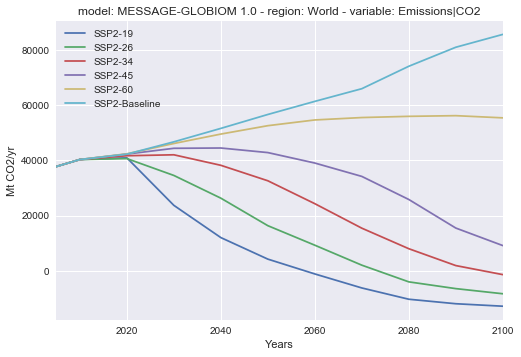

In [15]:
sr1p5.plot_lines(filters={'model':'MESSAGE', 'scenario': 'SSP2', 'variable': 'Emissions|CO2'}, save='test')

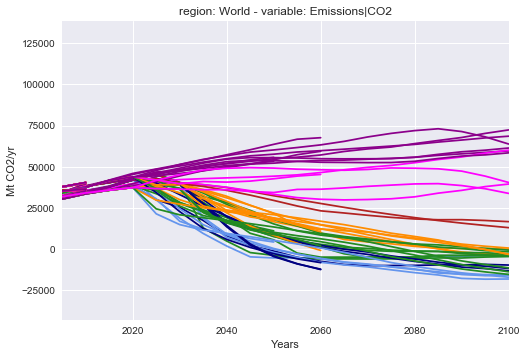

In [16]:
sr1p5.plot_lines(filters={'variable': 'Emissions|CO2'}, color_by_cat=True)

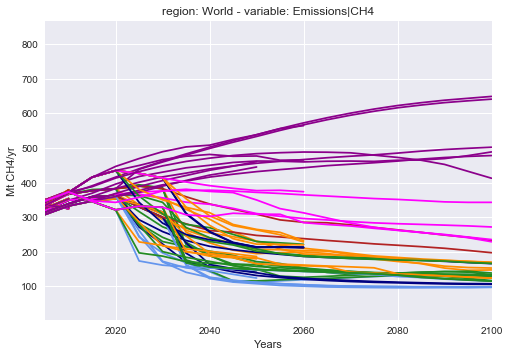

In [17]:
sr1p5.plot_lines(filters={'variable': 'Emissions|CH4'}, color_by_cat=True)